# Character Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

# TO DO :  Insert your surname, name and ID number


Student surname: Menti

Student name: Luca

ID: 2063594

In [19]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.1.1


In [20]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [21]:
ID = 2063594 #Your_ID
np.random.seed(ID)

In [22]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [23]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]


labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 63 64 72 62 58 63 53 57 54]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [54 63 64 72 62 58 63 53 57 54]


In [24]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


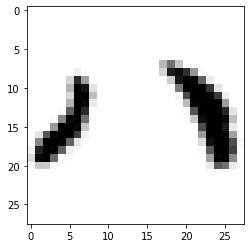

LABEL: 5
INPUT:


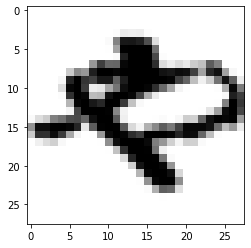

LABEL: 7
INPUT:


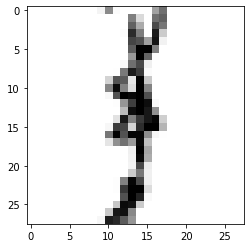

LABEL: 6


In [25]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [26]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(15,), (25,), (45,), (35,), (20,35,45), (40,15,30)  ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')


print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
data = {'Hidden layer sizes': [(15,), (25,), (45,), (35,), (20,35,45), (40,15,30)],'Score': clf.cv_results_['mean_test_score']}
df = pd.DataFrame(data)
df


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (45,)}
Score with best parameters:
0.7216666666666667

All scores on the grid:


,Hidden layer sizes,Score
0,"(15,)",0.703333
1,"(25,)",0.720000
2,"(45,)",0.721667
3,"(35,)",0.721667
4,"(20, 35, 45)",0.705000
5,"(40, 15, 30)",0.690000


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [27]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size':  [1, 3,9,27,81,243,480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)


# recall to use cv=kf to use the k-fold subdivision seen in the lectures

#hidden_layer_size
hls=clf.best_params_['hidden_layer_sizes']


mlp = MLPClassifier(hidden_layer_sizes=hls, max_iter=1000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)


clf = GridSearchCV(mlp, parameters, cv=kf)

clf.fit(X_train, y_train)


print ('RESULTS FOR NN\n')


print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
data = {'batch_size': [1, 3,9,27,81,243,480],'Score': clf.cv_results_['mean_test_score']}
df = pd.DataFrame(data)
df

RESULTS FOR NN

Best parameters set found:
{'batch_size': 81}
Score with best parameters:
0.7466666666666667

All scores on the grid:


,batch_size,Score
0,1,0.085000
1,3,0.108333
2,9,0.488333
3,27,0.741667
4,81,0.746667
5,243,0.740000
6,480,0.736667


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

We obtain a negligible score if we have batch size $\in \{1,3\}$ . This means that the NN is not effective at all. In fact with these values  as batch size a SGD is performing and we are moving toward a local minima probabily.\
Increasing the number of batch size we obtain a score almost equal to 75% if batch size $\in [27,243]$ with the best $ batch \ size $ equal to 81.\
With all selected batch sizes the NN converges but for 480. In this case we are performing a standard GD, that usually takes more iteration to reach the convergence. If we increase the number of iterations ( 1000  in this case) it reaches the convergence with a score around 70%.\
As concerned the number of layers and their size it is possible to assert that considering 1 layer NN with high number of neurons leads to the optimal solution. If we add more layers or we consider 1 layer with few neurons we obtain low scores.



### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (15,) ...
Done, training time: 0.26 sec

Training MLP of size (20, 35, 45) ...
Done, training time: 0.22 sec

Training MLP of size (25,) ...
Done, training time: 0.29 sec

Training MLP of size (35,) ...
Done, training time: 0.34 sec

Training MLP of size (40, 15, 30) ...
Done, training time: 0.30 sec

Training MLP of size (45,) ...
Done, training time: 0.38 sec



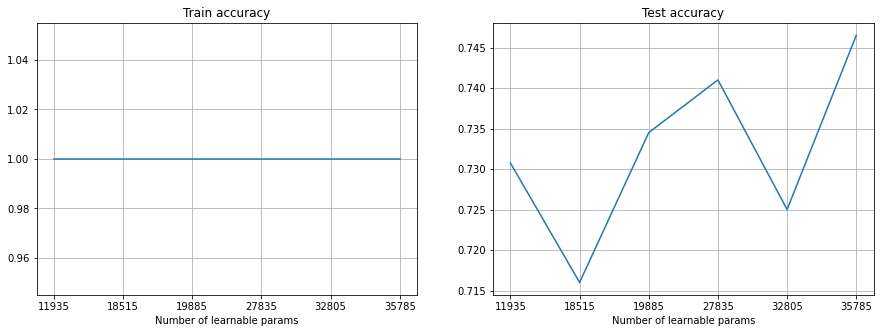

In [28]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(15,), (25,), (45,), (35,), (20,35,45), (40,15,30) ]
hl_labels = [param_count(t) for t in hl_sizes]
idx = np.argsort(hl_labels)
hl_sizes = np.array(hl_sizes, dtype=object)[idx]
hl_labels = np.array(hl_labels)[idx]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=100, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
    
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

As concerned the train accuracy we have a flat distribution at 1. One explanation for this could be the fact that our training set has got a small size. So one solution could be enlarging the training set.

As concerned the test accuracy instead we got that the best accuracy is with 1 layer NN with higher number of neurons. As we decrease the number of neurons (15,25) also accuracy decreases proving that the structure is too much simple for our dataset and we are underfitting.\
Instead if we increase the number of layers ((40, 15, 30) and (20, 35, 45) ) we can see that the accuracy drops as-well, proving that we are overfitting and we need less layers and weights in our model.


### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/Users/lukementi/opt/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukementi/opt/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lukementi/opt/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


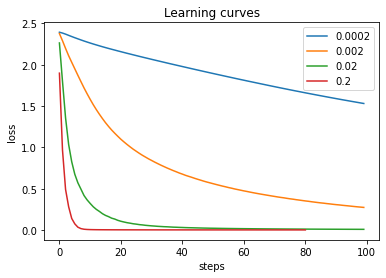

RESULTS FOR NN

Best parameters set found:
0.0002  0.5585
0.002  0.7465
0.02  0.7465
0.2  0.77775


Best parameter found:
0.2


Score with best parameters:
0.77775


In [29]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = []
best_size=clf.best_params_['batch_size']


for i in range(len(lr_list)):
    mlp = MLPClassifier(hidden_layer_sizes=hls, max_iter=100, alpha=1e-4, solver='sgd',batch_size=best_size,
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr_list[i], n_iter_no_change=60)
    
    mlp.fit(X_train,y_train)
    scores.append(mlp.score(X_test, y_test))
    loss_values = mlp.loss_curve_
    plt.plot(loss_values, label=str(lr_list[i]))

plt.legend(loc='upper right')
plt.title("Learning curves")
plt.xlabel("steps")
plt.ylabel("loss")
plt.show()



print ('RESULTS FOR NN\n')

print("Best parameters set found:")
for i in range(len(scores)):
        print(lr_list[i],"", scores[i])


print("\n")

max_=max(scores)
print("Best parameter found:")
for i in range(len(scores)):
     if max_== scores[i]:
            lrb=lr_list[i]
            print(lr_list[i])

print("\n")
print("Score with best parameters:")
print(max(scores))



### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
We can see that for a learning rate equal to 0.0002 the learning curve is not steep at all so  the learning process is slow and doesn't reach an accetable loss in 100 iteration. \
As the learning rate increases the learning process gets faster until 0.2 where it reaches the best loss. So it seems that moving through big steps is the best solution in this case.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.222250


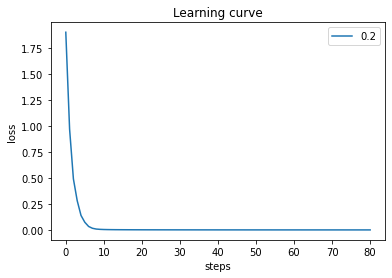

In [30]:
#get training and test error for the best NN model from CV
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=hls, max_iter=500, alpha=1e-4, solver='sgd',batch_size=best_size,
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lrb, n_iter_no_change=60)
    
mlp.fit(X_train,y_train)
loss_value = mlp.loss_curve_


#error
training_error=1-mlp.score(X_train, y_train)
y_prediction=mlp.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score



print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(loss_value, label=str(lr_list[i]))

plt.legend(loc='upper right')
plt.title("Learning curve")
plt.xlabel("steps")
plt.ylabel("loss")
plt.show()


## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [31]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [395 407 407 423 418 390 397 408 380 375]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [32]:
# use best architecture and params from before

big_mlp = MLPClassifier(max_iter=500, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lrb,hidden_layer_sizes=hls,batch_size=best_size,verbose=True)

big_mlp.fit(X_train,y_train)
loss_value = big_mlp.loss_curve_


print ('\nRESULTS FOR NN\n')



#get training and test error for the NN


#error
training_error=1-big_mlp.score(X_train, y_train)
y_prediction=big_mlp.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


Iteration 1, loss = 0.94431336
Iteration 2, loss = 0.43441909
Iteration 3, loss = 0.29614231
Iteration 4, loss = 0.20087497
Iteration 5, loss = 0.15338876
Iteration 6, loss = 0.09856896
Iteration 7, loss = 0.09448505
Iteration 8, loss = 0.08975333
Iteration 9, loss = 0.07606496
Iteration 10, loss = 0.07812646
Iteration 11, loss = 0.06682211
Iteration 12, loss = 0.05087183
Iteration 13, loss = 0.03088982
Iteration 14, loss = 0.02345760
Iteration 15, loss = 0.01122282
Iteration 16, loss = 0.00663422
Iteration 17, loss = 0.00212316
Iteration 18, loss = 0.00151284
Iteration 19, loss = 0.00131790
Iteration 20, loss = 0.00122811
Iteration 21, loss = 0.00117469
Iteration 22, loss = 0.00113394
Iteration 23, loss = 0.00109566
Iteration 24, loss = 0.00106771
Iteration 25, loss = 0.00104462
Iteration 26, loss = 0.00102615
Iteration 27, loss = 0.00100855
Iteration 28, loss = 0.00099301
Iteration 29, loss = 0.00097958
Iteration 30, loss = 0.00096776
Training loss did not improve more than tol=0.000

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]
We can see that the NN training error is the same for both cases (equal to 0) while the NN test error with a larger number of samples $\simeq 0.129$   is smaller than the one with $m_{training}$=600 that is $\simeq 0.222$. Hence, If we train the algorithm with more data with get better model, as expected.


### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


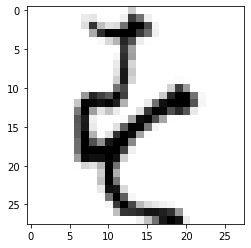

LABEL: 49791


In [33]:
from random import randint


NN_prediction=mlp.predict(X_test)
large_NN_prediction = big_mlp.predict(X_test)

y_item=[]
for i in range(len(y_test)):
    if NN_prediction [i] != y_test[i] and large_NN_prediction[i]== y_test[i]:
        y_item.append(i)

        
        
plot_input(X_test,y_item,randint(0,len((y_item))))

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


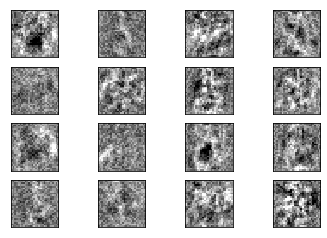

Weights with 4000 data points:


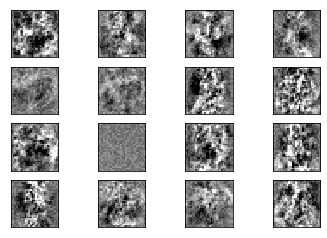

In [34]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = big_mlp.coefs_[0].min(), big_mlp.coefs_[0].max()
for coef, ax in zip(big_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
We would expect a smoother picture of the weights matrix if we consider a bigger amount of data points. More data points means a bigger variability on the weights i.e. a smoother picture in that we are representing the weight matrix between inputs and the first layer. 
By the way this is not clear from our results. One explanation for this could be the fact that the amount of data is not big enough to evidence this fact.


### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [35]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
best_SVM = SVC(C=10,kernel="rbf", gamma=0.01)

print("The best parameters are C=",10, ", gamma=", 0.01, "and kernel= RBF")

#ADD YOUR CODE

print ('RESULTS FOR SVM')


#error on train
score_train=best_SVM.fit(X_train, y_train).score(X_train, y_train)
SVM_training_error=1-score_train


print("Training error SVM:")
print(SVM_training_error)
print("Training score SVM:")
print(score_train)

#error on test
y_prediction = best_SVM.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
SVM_test_error=1-test_score

print("Test error SVM:")
print(SVM_test_error)
print("Test score SVM:")
print(test_score)


The best parameters are C= 10 , gamma= 0.01 and kernel= RBF
RESULTS FOR SVM
Training error SVM:
0.0
Training score SVM:
1.0
Test error SVM:
0.07399999999999995
Test score SVM:
0.926


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

regL2 =  LogisticRegression(C=1,max_iter=1000)

#error on train
score_train=regL2.fit(X_train,y_train).score(X_train, y_train)
training_error=1-score_train

#error on test
y_prediction =regL2.predict(X_test)
test_score=accuracy_score(y_test,y_prediction)
test_error=1-test_score


print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1-score_train 
test_error = 1-test_score

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)
print ("Training score (reg): %f" % score_train)
print ("Test score (reg): %f" % test_score)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.025200
Test error (reg): 0.239200
Training score (reg): 0.974800
Test score (reg): 0.760800


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

The results are the following in table.

| Algorithm| Training error | Test error  |
| :- | -: | :-: |
|Logistic Regression | 0.03 | 0.24
|SVM| 0.00 | 0.07
|NN| 0.00 | 0.13


We can see that Logistic Regression achieves the worst result while the SVM achieves the best altough they are very similars to NN's one. \
Although this, we have to consider the fact that computation time for the SVM is longer than NN, so better results but much more computation time.


## QUESTION 7

What are the different ways in which you can improve the results obtained for NN? List and justify some of them.

##### [ANSWER TO QUESTION 7]

Difference ways are:
- using more data
- optimazing the number of neurons in the layer
- normalizing data
- changing learning rate and momentum parameter 


First of all we could use more data. In fact when we have lots of data the neural network generalizes well  otherwise it may overfits data.The quality of the data is important as-well. \
Secondly we could optimazie  the number of neurons in the layer. In fact if an inadequate number of neurons are used, the network will be unable to model complex data, and the resulting fit will be poor. If too many neurons are used, the training time may become excessively long, and, worse, the network may overfit the data. 

